In [2]:
# Base packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datasets

pmdarima datasets [Documentation](https://alkaline-ml.com/pmdarima/modules/classes.html#pmdarima-datasets-toy-timeseries-datasets)<br>
statsmodel library [Documentation](https://www.statsmodels.org/stable/index.html)

In [3]:
# You need to re-install statsmodel before installing pmdarim on google colab
# On your local machine, be careful on the versions you are using
from typing import Literal
from pmdarima.datasets import load_lynx, load_airpassengers,load_heartrate

In [87]:
airp_df = load_airpassengers(as_series=True)
airp_df.index = pd.date_range(start='01/01/1949', periods=len(airp_df), freq='M')
airp_df.name = 'Air Passenger'

lynx_df = load_lynx(as_series=True)
lynx_df.index = pd.date_range(start='01/01/1821', periods=len(lynx_df), freq='Y')
lynx_df.name = 'Lynx Population'

rate_df = load_heartrate(as_series=True)
rate_df.index = np.arange(0, len(rate_df)/2, 0.5)
rate_df.name = 'Heartrate'

# Time Series Components

## Trend

The Hodrick-Prescott (HP) filter has become a benchmark for getting
rid of trend movements in data. This method is broadly employed
for econometric methods in applied macroeconomics research.

The HP filter will return two outputs: the cyclical part and the trend part of the Time Series. In this part, we will focus on the trend part.

It has one parameter : lambda. A value of 1600 is suggested for quarterly data. Lambda should be 6.25 (1600/4^4) for annual data and 129600 (1600x3^4) for monthly data.

You can find the Hodrick-Prescott filter, as well as other filters, on the **statsmodel** library : [Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html#statsmodels.tsa.filters.hp_filter.hpfilter)<br>
`from statsmodels.tsa.filters.hp_filter import hpfilter`

**1.a. Display the airp_df graph. <br>
1.b. Use the Hodrick-Prescott filter (from the statsmodel library) on the airp_df dataframe and display the graph.**

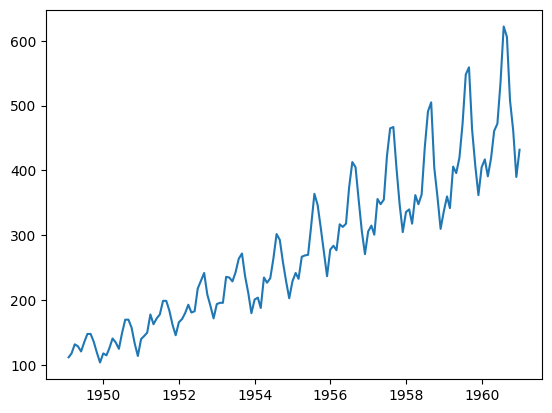

In [6]:
plt.plot(airp_df)

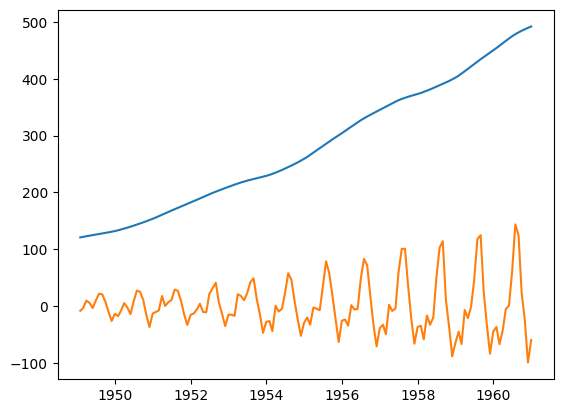

In [15]:
import statsmodels.api as sm

cycle, trend = sm.tsa.filters.hpfilter(airp_df, 1600)
plt.plot(trend)
plt.plot(cycle)

**2. Do the same on the lynx_df and the rate_df.**

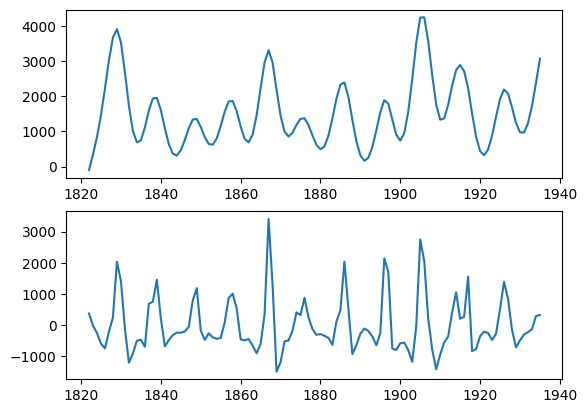

In [28]:
import statsmodels.api as sm

cycle, trend = sm.tsa.filters.hpfilter(lynx_df, lamb=6)
fig, axs = plt.subplots(2)
axs[0].plot(trend)

axs[1].plot(cycle)

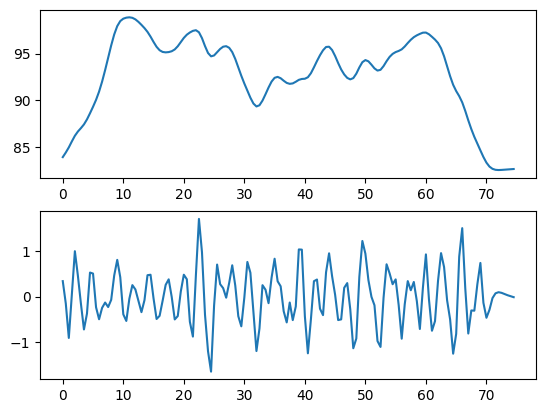

In [29]:
cycle, trend = sm.tsa.filters.hpfilter(rate_df, lamb=6)
fig, axs = plt.subplots(2)
axs[0].plot(trend)

axs[1].plot(cycle)

It is also possible to know if a Time Series has a trend using the [Kendall Tau coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

The Kendall Tau, or Kendall rank correlation coefficient, measures the monotony of the slope. Kendall's Tau varies between -1 and 1; it is positive when the trend increases and negative when the trend decreases.

This test also return a p-value, also known as the significance, which represents the threshold for which the hypothesis (no trend) is accepted. The trend is statistically significant when the p-value is less than 0.05.

You can use the Kendall tau function from Scipy : [Documentation](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html)


**3. Compute the Kendall Tau on the airp_df, lynx_df and rate_df. What can you say about the trends ?**

In [36]:
import scipy.stats as stats
tau, p_value = stats.kendalltau(airp_df, airp_df.index)
print(f'{tau} p ={p_value}.')
tau, p_value = stats.kendalltau(rate_df, rate_df.index)
print(f'{tau} p = {p_value}.')
tau, p_value = stats.kendalltau(lynx_df, lynx_df.index)
print(f'{tau} p = {p_value}.')


0.8098232119400293 p =6.584144856287916e-47.
-0.17680813944706034 p = 0.0013441834809797112.
0.06134493229603672 p = 0.33338544433097494.


## Seasonality

**1. Visually, can you find which Time Series (airp, lynx, rate) has a seasonality part ?**

Pure seasonality can be shown using a boxplot representation. A box plot is an essential graph to depict data spread out over a range. It is a standard approach to showing the minimum, first quartile, middle, third quartile, and maximum.

Boxplots can be displayed using the .boxplot() of pandas or using the boxplot() function from [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**2. Display a boxplot graph month by month for airp_df. Do you see any seasonality ?**

Autocorrelation is used to check randomness in data. It helps to identify
types of data where the period is not known. For instance, for monthly
data, if there is a regular seasonal effect, we would hope to see massive
peak lags after every 12 months.

You can plot them using the `plot_acf` from `statsmodels.graphics.tsaplots`.
[Documentation](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

**3. Display the airp_df autocorrelation_plot using the statsmodels library. Do you see any seasonality ?**

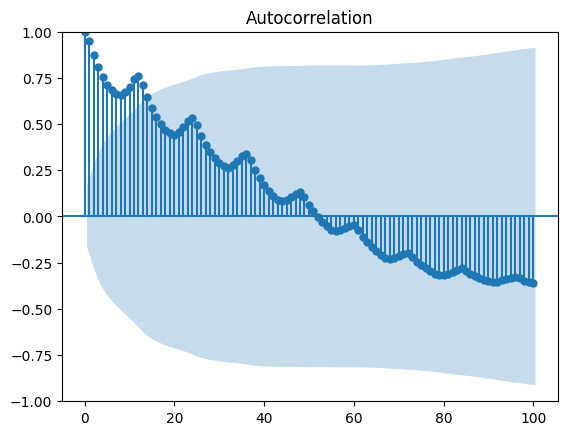

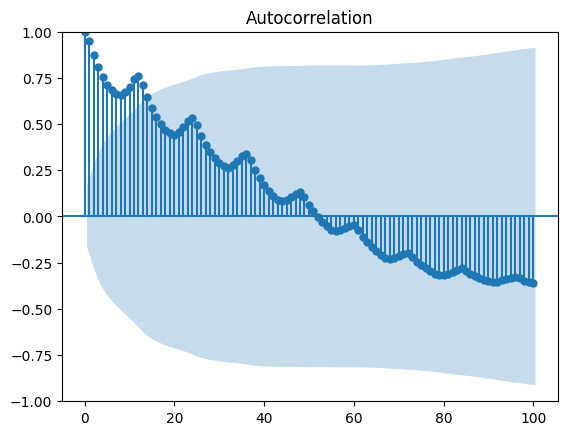

In [45]:
sm.graphics.tsa.plot_acf(airp_df, lags=100)

**4. Do the same for the lynx_df and the rate_df.**<br>

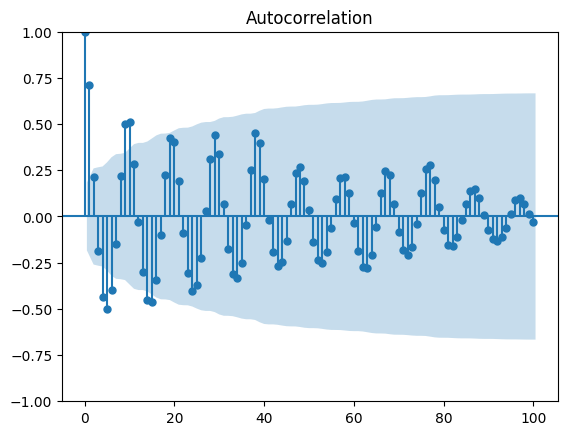

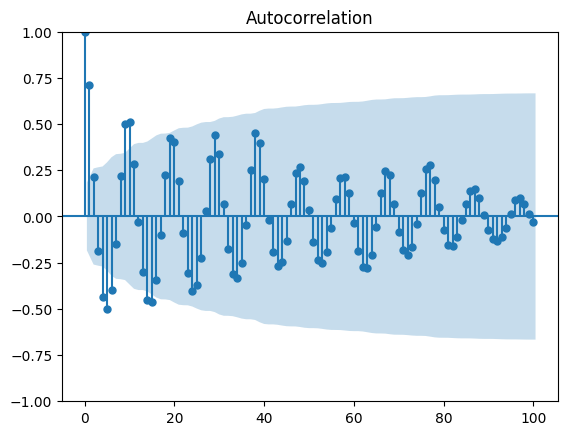

In [43]:
sm.graphics.tsa.plot_acf(lynx_df, lags=100)

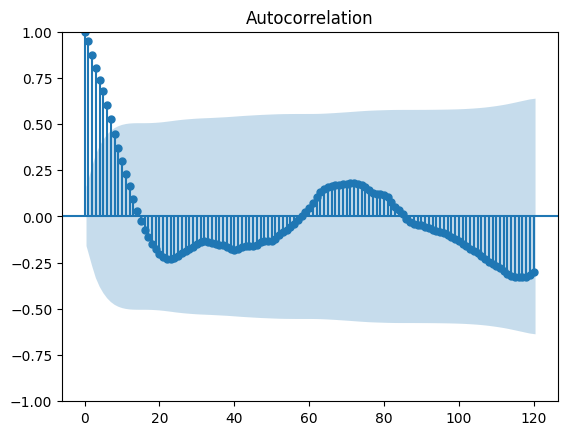

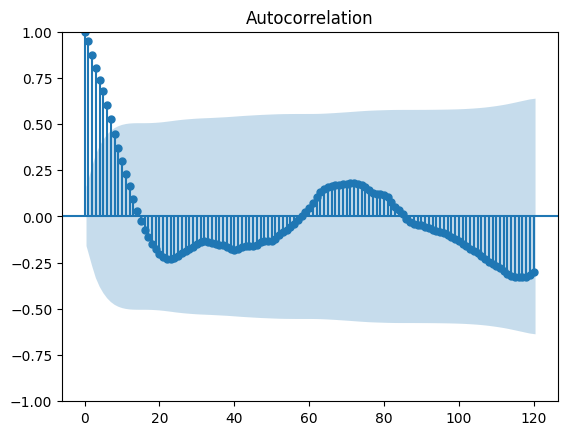

In [48]:
sm.graphics.tsa.plot_acf(rate_df, lags=120)

## Time Series Decomposition

The decomposition of a time series is the process of extracting the three components (Trend, Seasonality (*not cyclicity*) and residuals) and representing them as their models. The modeling of the decomposed components can be either additive or multiplicative. 

HPfilter is a decomposition method. However, it also extracts the cyclicity. Fortunately, other methods exist such as the Seasonal-Trend decomposition with LOESS (STL) or the moving average method that you can found on statsmodel. STL is more robust than the moving average method for measuring non-linear relationships. Additionally, STL assumes additive composition, so you do not need to indicate a model, unlike with seasonal_decompose. 

The statsmodel model library can be used to decompose a Time Series : 

*   STL [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html)
*   Moving average Decomposition [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

**1.a. Use the additive moving average decomposition method from statsmodel (`seasonal_decompose`) to decompose the airp_df Time Series.**<br> 
**1.b. Do the same with a multiplicative method.**<br>
**1.c. What can you say about the residuals ?**

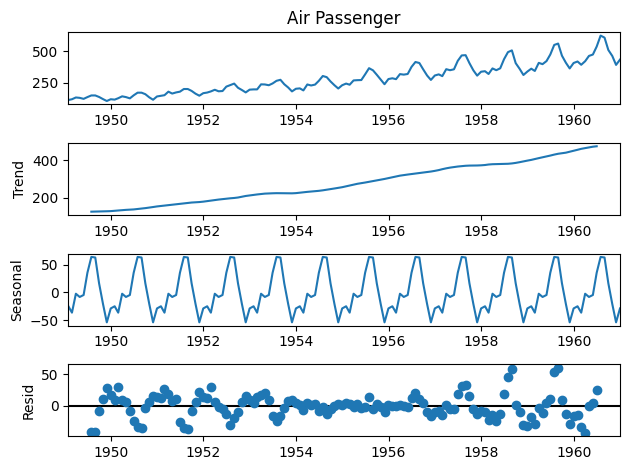

In [60]:
import statsmodels
seasonal  = statsmodels.tsa.seasonal.seasonal_decompose(airp_df, model='additive')
plt.show(seasonal.plot())

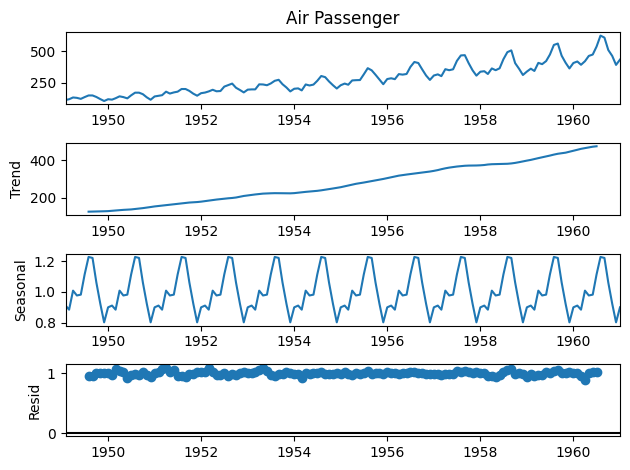

In [62]:
import statsmodels
seasonal  = statsmodels.tsa.seasonal.seasonal_decompose(airp_df, model='multiplicative')
plt.show(seasonal.plot())

**2. Using the output of the additive method, add the trend, the seasonal and the residual part togetherand display the result.**

Another decomposition option within statsmodels is **STL**, which is a more
advanced decomposition technique. The STL class has more parameters than the moving average method:

*   The **period** parameter that is the seasonal time interval. For example, a monthly seasonality sets the period parameter to 12 because it will repeat every 12 time steps. This parameter can be set to None and the statsmodels STL class will automatically estimate the period. Be careful, for yearly data, there is no definite period thus, period=None will yield an error.
*   The **seasonal** parameter is for the seasonal smoother and can also only take odd integer values greater than or equal to 7. Similarly, the STL function has a trend smoother (the **trend** parameter).
*   The **robust** parameter, which takes a Boolean value (True or False). Setting robust=True helps remove the impact of outliers on seasonal and trend components when calculated.

**3. Use the STL decomposition method from statsmodel (`STL`) to decompose the airp_df Time Series and display the result.**

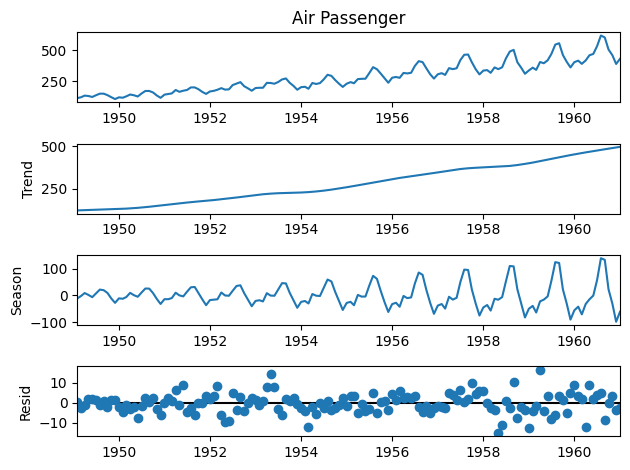

In [67]:
keke = statsmodels.tsa.seasonal.STL(airp_df).fit()
plt.show(keke.plot())

**4.a. Use the STL decomposition on the lynx_df using a period value of your choice. Explain why this value.**<br>
**4.b Is there any seasonality is the lynx_df Time Series ? Why ?**

**5. Should you try to decompose the rate_df Time Series ?**

## Cyclicity

Some filters can isolate the Time Series cycles. Two of them are the **Christiano-Fitzgerald** and the **Baxter and King** (BK) filter. These filters formulate the de-trending and smoothing problem in the frequency domain.

Be careful, the parameters of the filters highly depend on the Time interval of the Time Series !

BK parameters:


*   low : 1.5 for annual data, 6 for quarterly data, 18 for monthly data
*   high : 8 for annual data, 32 for quarterly data, 96 for monthly data
*   K : 3 for annual data, 12 for quarterly data, 36 for monthly data

The low and the high parameters of the CF filter can take the same range of values than the BK filter (except for low that is >= 2).

You can find them on the statsmodels library:

*   Christiano-Fitzgerald [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.cf_filter.cffilter.html#statsmodels.tsa.filters.cf_filter.cffilter)
*   Baxter and King [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.bk_filter.bkfilter.html#statsmodels.tsa.filters.bk_filter.bkfilter)

**1.a. Use the CF and the BK on the airp_df and display the cycle graph.**<br>
**1.b. Do you have any cycle (seasonality not included) in this Time Series ?**

In [81]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(airp_df, low = 18, high= 96)

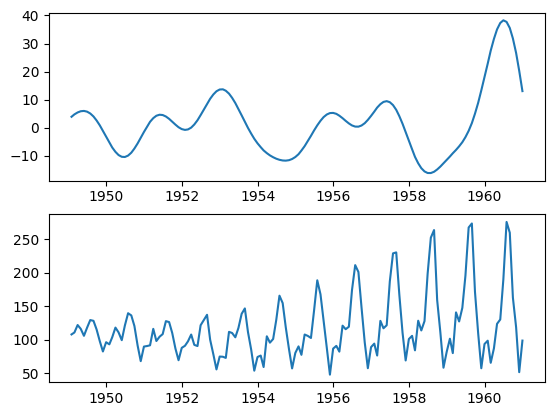

In [78]:
fig, axs = plt.subplots(2)
axs[0].plot(cf_cycles)

axs[1].plot(cf_trend)

**2. Do the same for the lynx_df Time Series.**

# Stationarity

## Detect Stationarity

Stationarity is one of the most important property of a Time Series. It can be detected using 4 methods:

*   Data Visualization
*   Autocorrelation plots
*   Summary Statistics
*   Statistical Tests

Data visualization and ACF have already been done earlier is this notebook. This part will focus on the remaining two options: summary statistics and statistical tests.


**1. Using the graph reprensentation and the ACF of the previous questions, which one(s) of the Time Series seem to be stationary ?**

The airp_df is clearly not stationary.<br>
The lynx_df seems not stationary but it is much less clearer than the airp_df.<br>
The rate_df seems not stationary but it is also much less clearer than the airp_df.

**2.a. Compute the moving-mean and the moving-variance of the airp_df over a window of size `len(Time Series)//3`. Do they vary a lot ?**<br>
**2.b. Do the same for the lynx_df and the rate_df**

In [95]:
reliance = airp_df.rolling(len(airp_df//3)).mean()
reliance.dropna(inplace=True)
reliance

1960-12-31    280.298611
Freq: M, Name: Air Passenger, dtype: float64

In [97]:
reliance = rate_df.rolling(len(rate_df//3)).mean()
reliance.dropna(inplace=True)
reliance

In [94]:
reliance = lynx_df.rolling(len(lynx_df//3)).mean()
reliance.dropna(inplace=True)
reliance

1934-12-31    1538.017544
Freq: A-DEC, Name: Lynx Population, dtype: float64

The **ADFuller** ([Documentation](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)) test is used to check the stationarity of a Time Series. It tests for unit roots in a univariate time series process using linear regression and the lags of the Time Series.

Note that unit roots are just one cause for a time series to be non-stationary, but generally, the presence of unit roots indicates non-stationarity.

You can use the `adfuller()` class from the statsmodels library.<br>
statsmodels `adfuller()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)<br>

You can tune some parameters such as the type of regression used by the model or the number of lags used.

**3.a. Use the Augmented Dickey-Fuller (ADFuller) test the airp, rate and lynx Time Series.**<br>
**3.b. Comment the results.**

**4.a. Using the following dummy Time Series that has a strong trend but no seasonality nor cyclicity, compute the ADFuller test using the default parameters.**<br>
**4.b. Do the same by setting the `regression` parameter to 'ct'. What happened ?**

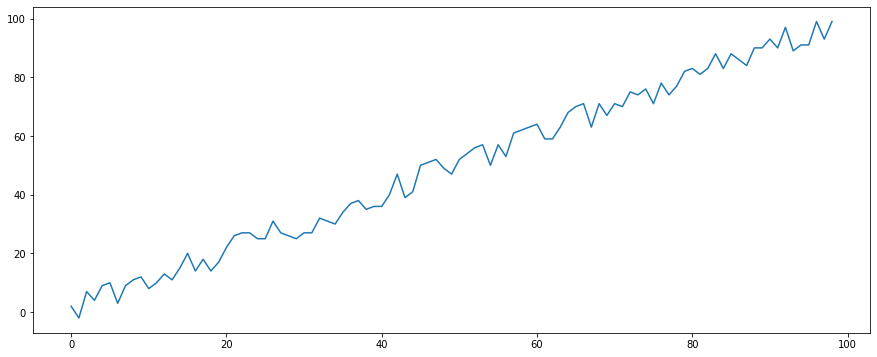

In [ ]:
dummy_df = pd.Series(np.arange(1,100,1)+np.random.randint(-5,5,99))
dummy_df.plot(figsize=(15,6))
plt.show()

The **Kwiatkowski–Phillips–Schmidt–Shin** (Documentation) test can also be used to detect stationarity in the Time Series. It is very similar to the ADFuller test. However, the Time Series is considered non-stationary if the p-value is lower than 0.05.

statsmodels `kpss()` [Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html)

**5. Do the same as question 3 with the kpss test.**

## Non-stationary to stationary


Stationarity can be solved by removing trends including the constant and the seasonal ones. It is generally done with the differencing method.

**First-order differencing**: Also known as detrending, which is calculated by subtracting an observation at time t from the previous observation at time t-1 𝑦(𝑡) − 𝑦(𝑡−1). In pandas this can be done using the `.diff()` function, which defaults to period=1. Note that the differenced data will contain one less data point (row) than the original data.

*ex: a lag of 1 will subtract the previous day from the current day ; a lag of 7 will subtract the previous monday from the current monday ...*

`pd.diff(periods, axis=0)` [Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)

**1. Remove the trend from the airp_df using the `diff()` function with a lag of 1 and display the graph. Is the airp_df stationary ?**

**2.a. Is there a seasonality on the airp_df ? If so, is it monthly ? Yearly ? Choose the `periods` parameter value according to the seasonality.**<br> 
**2.b. Apply the first order differencing with this new period and display the graph. Is the Time Series completely stationary now ?**

Most of the time, you will need to add the trend and/or the seasonality back to the Time series after the forecasting step.

To do so, you can add (instead of subtract) the n-k value to the n value. k is the period value. 

*ex: for a first-order differencing of `y(t) = y(t) - y(t-1)`, you can do the reverse using `y(t) = y(t) + y(t-1)`.*

**3. Using the Time Series obtained at the question 1, get back to the original one (with trends).**

**Second-order differencing** is useful if both trend and seasonality exist or simply if the first-order differencing was insufficient. This is essentially differencing twice – differencing to remove seasonality followed by differencing to remove trend.

It can also be used to remove two different type of seasonality.

**4. Use the `diff()` two times successively : one with a period of 1 followed by one with the period found at question 2. <br>Is the Time Series stationary now ?**

**5. Using the second-order differenced Time Series of the question 4, get back to the original one (with trends).**